Jeromey Schwartz

HW1

801055747

https://github.com/JS-CTRL/RealTimeAI/tree/main/HW1

Problem 1

In [4]:
#Importing Libraries
import numpy as np
import torch
import imageio
import matplotlib.pyplot as plt

In [5]:
#Import image
img_arr = imageio.imread('../HW1/data/color4.png')

In [6]:
#Image shape Height x Width x RGB
img_arr.shape 

(743, 990, 4)

In [7]:
#Image to torch tensor then changing dimensions to RGBxHeightxWidth
img = torch.from_numpy(img_arr)
out = img.permute(2, 0, 1)
out.shape, out

(torch.Size([4, 743, 990]),
 tensor([[[ 68,  68,  ..., 142, 142],
          [ 67,  68,  ..., 142, 142],
          ...,
          [ 66,  64,  ...,  27,  26],
          [ 68,  64,  ...,  26,  25]],
 
         [[109, 109,  ..., 147, 147],
          [108, 109,  ..., 147, 147],
          ...,
          [ 70,  68,  ...,  31,  31],
          [ 70,  68,  ...,  30,  30]],
 
         [[153, 153,  ..., 167, 167],
          [152, 153,  ..., 167, 167],
          ...,
          [ 82,  79,  ...,  14,  11],
          [ 83,  79,  ...,  13,  10]],
 
         [[255, 255,  ..., 255, 255],
          [255, 255,  ..., 255, 255],
          ...,
          [255, 255,  ..., 255, 255],
          [255, 255,  ..., 255, 255]]], dtype=torch.uint8))

In [8]:
#Converting out to double (required for torch.mean)
double=out.to(torch.double)
double.shape

torch.Size([4, 743, 990])

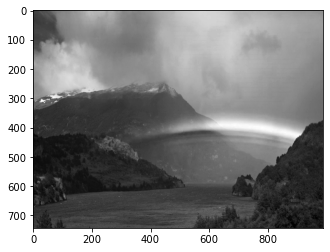

In [9]:
#Plotting Red channel for visual inspection
#White values indicate high levels of the color red
red_channel=double[0,:,:]
plt.imshow(red_channel,cmap='gray', vmin=0, vmax=255, clim=(240, 255))

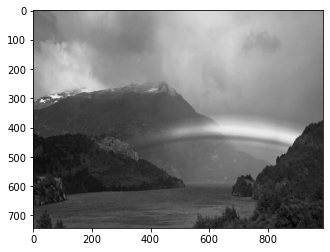

In [10]:
#Plotting Green channel for visual inspection
#White values indicate high levels of the color green
green_channel=double[1,:,:]
plt.imshow(green_channel,cmap='gray', vmin=0, vmax=255)


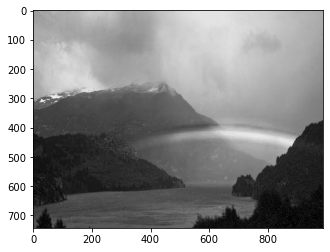

In [11]:
#Plotting Blue channel for visual inspection
#White values indicate high levels of the color blue
blue_channel=double[2,:,:]
plt.imshow(blue_channel,cmap='gray', vmin=0, vmax=255)

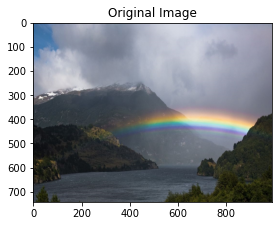

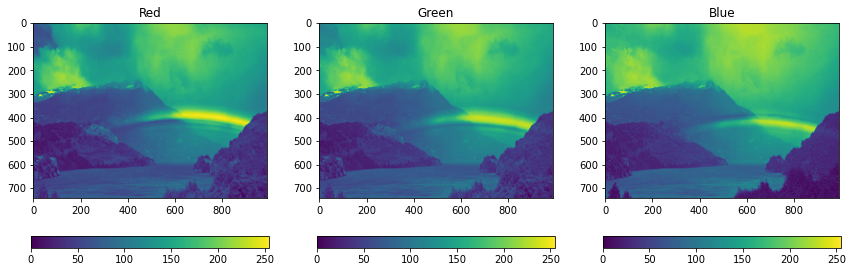

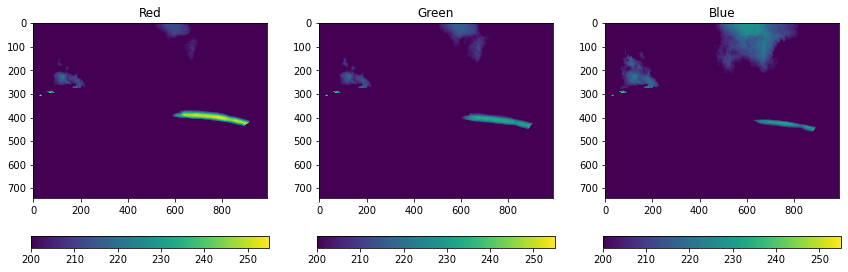

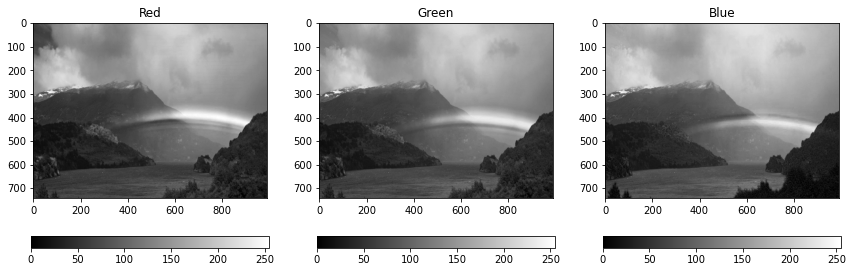

In [12]:
#Side by Side visualization

#Original Image
fig = plt.figure()
ax = fig.add_subplot(4, 3, 2)
red=plt.imshow(img_arr)
ax.set_title('Original Image')
plt.subplots_adjust(bottom=1, right=2, top=5)

#Sliced into RGB 

#Yellow indicates high color values and blue low values
fig = plt.figure()
ax = fig.add_subplot(4, 3, 4)
red=plt.imshow(red_channel)
ax.set_title('Red')
plt.colorbar( orientation='horizontal')
ax = fig.add_subplot(4, 3,5 )
plt.imshow(green_channel)
ax.set_title('Green')
plt.colorbar( orientation='horizontal')
ax = fig.add_subplot(4, 3, 6)
plt.imshow(blue_channel)
ax.set_title('Blue')
plt.colorbar( orientation='horizontal')
plt.subplots_adjust(bottom=1, right=2, top=5)

#Yellow indicates high color values and blue low values,
  #with cutoff set for low values(cuts out noise of other channels)
fig = plt.figure()
ax = fig.add_subplot(4, 3, 7)
red=plt.imshow(red_channel, clim=(200, 255))
ax.set_title('Red')
plt.colorbar( orientation='horizontal')
ax = fig.add_subplot(4, 3,8 )
plt.imshow(green_channel, clim=(200, 255))
ax.set_title('Green')
plt.colorbar( orientation='horizontal')
ax = fig.add_subplot(4, 3, 9)
plt.imshow(blue_channel, clim=(200, 255))
ax.set_title('Blue')
plt.colorbar( orientation='horizontal')
plt.subplots_adjust(bottom=1, right=2, top=5)

#Greyscale, white indicates high color values and black indicates low
fig = plt.figure()
ax = fig.add_subplot(4, 3, 10)
red=plt.imshow(red_channel,cmap='gray', vmin=0, vmax=255)
ax.set_title('Red')
plt.colorbar( orientation='horizontal')
ax = fig.add_subplot(4, 3,11)
plt.imshow(green_channel,cmap='gray', vmin=0, vmax=255)
ax.set_title('Green')
plt.colorbar( orientation='horizontal')
ax = fig.add_subplot(4, 3, 12)
plt.imshow(blue_channel,cmap='gray', vmin=0, vmax=255)
ax.set_title('Blue')
plt.colorbar( orientation='horizontal')
plt.subplots_adjust(bottom=1, right=2, top=5)

In [13]:
#Create array rgb to hold mean for each channel
rgb=np.array([0,0,0])
for x in range(3):
    rgb[x]=torch.mean(double[x,:,:])

In [14]:
#Total is the sum of the RGB channels percent is percent color out of total
total=np.sum(rgb[:])
percent=rgb/total
percent

array([0.31563422, 0.33038348, 0.3539823 ])

In [15]:
#Color is the max index value of rgb where red=0, green=1, blue=2
color=percent.argmax(axis=0)
color

2

Problem 2

In [16]:
#defining libraries
%matplotlib inline
import numpy as np
import torch
torch.set_printoptions(edgeitems=2)

In [17]:
#importing data
#t_c=input
#t_u=output
#t_un=output with simple normalization
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0, 8.0,
                    3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9,
                    33.9, 21.8, 48.4, 60.4, 68.4])
t_un = 0.1 * t_u 

In [18]:
#defining linear model 
def model1(t_u, w, b):     
    return w * t_u + b

In [19]:
#defining non-linear model 
def model2(t_u, w1, w2, b):  
    return w2*t_u**2+w1*t_u+b

In [20]:
#defining loss function
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [21]:
#initializing parameters for non-linear model 
params = torch.tensor([1.0, 1.0,1.0], requires_grad=True)

In [22]:
#defining traiining loop for non-linear model, note uses model2
def training_loop_nonlinear(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:  # <1>
            params.grad.zero_()
        
        t_p = model2(t_u, *params) 
        loss = loss_fn(t_p, t_c)
        loss.backward()
        
        with torch.no_grad():  # <2>
            params -= learning_rate * params.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [23]:
#defining traiining loop for non-linear model, note uses model1
def training_loop_linear(n_epochs, learning_rate, params, t_u, t_c):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:  # <1>
            params.grad.zero_()
        
        t_p = model1(t_u, *params) 
        loss = loss_fn(t_p, t_c)
        loss.backward()
        
        with torch.no_grad():  # <2>
            params -= learning_rate * params.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [24]:
#params for linear model, note 2 parameters (w and b)
params_linear=training_loop_linear(
    n_epochs = 5000, 
    learning_rate = 1e-2, 
    params = torch.tensor([1.0, 1.0], requires_grad=True), # <1> 
    t_u = t_un, # <2> 
    t_c = t_c)

Epoch 500, Loss 8.420959
Epoch 1000, Loss 3.930977
Epoch 1500, Loss 3.110900
Epoch 2000, Loss 2.961117
Epoch 2500, Loss 2.933759
Epoch 3000, Loss 2.928763
Epoch 3500, Loss 2.927850
Epoch 4000, Loss 2.927683
Epoch 4500, Loss 2.927651
Epoch 5000, Loss 2.927647


In [25]:
#params for linear model, note 3 parameters (w1, w2 and b)
params_nonlinear=training_loop_nonlinear(
    n_epochs = 5000, 
    learning_rate = 1e-4, 
    params = torch.tensor([1.0, 1.0,-4.0], requires_grad=True), # <1> 
    t_u = t_un, # <2> 
    t_c = t_c)

Epoch 500, Loss 3.833239
Epoch 1000, Loss 3.505254
Epoch 1500, Loss 3.271483
Epoch 2000, Loss 3.104728
Epoch 2500, Loss 2.985644
Epoch 3000, Loss 2.900472
Epoch 3500, Loss 2.839422
Epoch 4000, Loss 2.795531
Epoch 4500, Loss 2.763847
Epoch 5000, Loss 2.740847


In [26]:
#print linear parameters
params_linear

tensor([  5.3671, -17.3010], requires_grad=True)

In [27]:
#print non-linear parameters
params_nonlinear

tensor([ 0.2075,  0.4763, -4.3893], requires_grad=True)

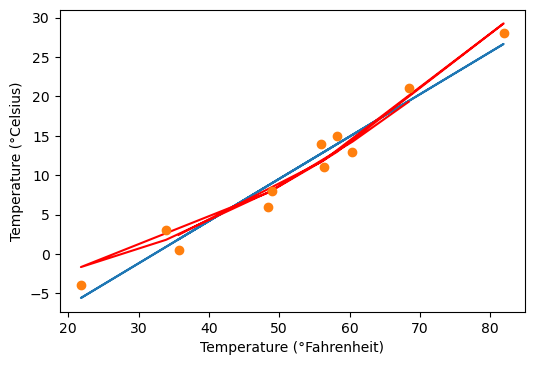

In [28]:
#plotting linear vs non-linear predictive model vs validation data
#orange=val data
#blue=linear model
#red=non-linear model
from matplotlib import pyplot as plt

lin = model1(t_un, *params_linear)  
nonlin= model2(t_un, *params_nonlinear)
fig = plt.figure(dpi=100)
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), lin.detach().numpy())
plt.plot(t_u.numpy(), nonlin.detach().numpy(),'r') 
plt.plot(t_u.numpy(), t_c.numpy(), 'o')
plt.savefig("Problem2.png", format="png") 

Problem 3

In [29]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import torch
torch.set_printoptions(edgeitems=2)

In [30]:
#importing dataset
housing = pd.DataFrame(pd.read_csv("../HW1/data/Housing.csv")) 
housing.head() 

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [31]:
#dataset length
m = len(housing) 
m 

545

In [32]:
#slicing out desired features from dataset
num_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking','price'] 
Newtrain = housing[num_vars] 
Newtrain.head() 
Newtrain.shape

(545, 6)

In [33]:
#setting values of x1-5 = price influences/features
x5=torch.tensor(Newtrain['area'], dtype=torch.float)
x4=torch.tensor(Newtrain['bedrooms'], dtype=torch.float)
x3=torch.tensor(Newtrain['bathrooms'], dtype=torch.float)
x2=torch.tensor(Newtrain['stories'], dtype=torch.float)
x1=torch.tensor(Newtrain['parking'], dtype=torch.float)

#normalizing x1-x5
x1_mean=torch.mean(x1,dim=0)
x1_var=torch.var(x1,dim=0)
x1=(x1-x1_mean)/torch.sqrt(x1_var)

x2_mean=torch.mean(x2,dim=0)
x2_var=torch.var(x2,dim=0)
x2=(x2-x2_mean)/torch.sqrt(x2_var)

x3_mean=torch.mean(x3,dim=0)
x3_var=torch.var(x3,dim=0)
x3=(x3-x3_mean)/torch.sqrt(x3_var)

x4_mean=torch.mean(x4,dim=0)
x4_var=torch.var(x4,dim=0)
x4=(x4-x4_mean)/torch.sqrt(x4_var)

x5_mean=torch.mean(x5,dim=0)
x5_var=torch.var(x5,dim=0)
x5=(x5-x5_mean)/torch.sqrt(x5_var)

In [34]:
#setting price as the validation output u
#normalizing u
u=torch.tensor(Newtrain['price'], dtype=torch.float)
u_mean=torch.mean(u,dim=0)
u_var=torch.var(u,dim=0)
u=(u-u_mean)/torch.sqrt(u_var)

In [35]:
#defining linear model, note that w1-5 and b are the parameters 
def model(w5,w4,w3,w2,w1,b,x5,x4,x3,x2,x1):
    return w5*x5*5+w4*x4*4+w3*x3*3+w2*x2*2+w1*x1+b

In [36]:
#loss function, difference between predicted value and true validation value u
def loss_fn(wx, u):
    squared_diffs = (wx - u)**2
    return squared_diffs.mean()

In [37]:
#initializing params(w5-w1 and b)
params = torch.tensor([1.0,1,1,1,1,1], requires_grad=True)

In [38]:
params.grad is None

True

In [39]:
params.dtype

torch.float32

In [40]:
#defining loss
loss = loss_fn(model(*params,x5,x4,x3,x2,x1), u)
loss.backward()

In [41]:
#new params
params.grad

tensor([61.6254, 51.6729, 34.5990, 18.5961,  7.1093,  2.0000])

In [42]:
if params.grad is not None:
    params.grad.zero_()

In [43]:
#defining the training loop
def training_loop(n_epochs, learning_rate, params, wx, u):
    for epoch in range(1, n_epochs + 1):
        if params.grad is not None:  
            params.grad.zero_()
        
        wx = model(*params,x5,x4,x3,x2,x1) 
        loss = loss_fn(wx, u)
        loss.backward()
        
        with torch.no_grad(): 
            params -= learning_rate * params.grad

        if epoch % 500 == 0:
            print('Epoch %d, Loss %f' % (epoch, float(loss)))
            
    return params

In [44]:
#running the training to determine best params for linear model 
params=training_loop(
    n_epochs = 5000, 
    learning_rate = 1e-3, 
    params = torch.tensor([1.0,0,0,0,0,0], requires_grad=True),
    wx = model(*params,x5,x4,x3,x2,x1), 
    u = u)

Epoch 500, Loss 0.446237
Epoch 1000, Loss 0.439173
Epoch 1500, Loss 0.437897
Epoch 2000, Loss 0.437665
Epoch 2500, Loss 0.437622
Epoch 3000, Loss 0.437615
Epoch 3500, Loss 0.437613
Epoch 4000, Loss 0.437613
Epoch 4500, Loss 0.437613
Epoch 5000, Loss 0.437613


In [45]:
#viewing params(w5-w1 and b)
params

tensor([ 7.6837e-02,  1.6555e-02,  1.0152e-01,  1.2706e-01,  1.7389e-01,
        -8.5093e-08], requires_grad=True)

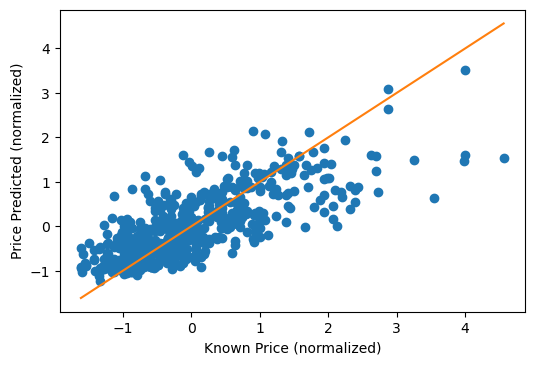

In [47]:
#plotting prediction vs validation
#Perfect prediction would follow the orange line, y=1x+0
from matplotlib import pyplot as plt

wx = model(*params,x5,x4,x3,x2,x1) 

fig = plt.figure(dpi=100)
plt.xlabel("Known Price (normalized)")
plt.ylabel("Price Predicted (normalized)")
plt.plot(u.numpy(), wx.detach().numpy(), 'o') 
plt.plot(u.numpy(), u.numpy())
plt.savefig("Problem3.png", format="png")